# E-commerce datasets

### Commerce data analysis
datasets: https://www.kaggle.com/datasets/carrie1/ecommerce-data?select=data.csv

In [2]:
import pandas as pd
pd.options.display.float_format = '{:5f}'.format
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/yoo/Google Drive/내 드라이브/ML_Algorithm/datasets/ecommerce_data.csv', encoding='latin1')
print(df.shape)

df.head(20)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.550000,17850.000000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.390000,17850.000000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.750000,17850.000000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.390000,17850.000000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.390000,17850.000000,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.650000,17850.000000,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.250000,17850.000000,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.850000,17850.000000,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.850000,17850.000000,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.690000,13047.000000,United Kingdom


In [4]:
######################
### SQL query ZONE ###
######################

# InvoiceNo 중 한번에 제일 많이 purchase 한 횟수는 약 1170.
# StockCode는 물품 Category라고 보아도 무방.
# 구매 중, 제일 많이 구매된 StockCode Category는 10002이며, Description은 INFLATABLE POLITICAL GLOBE
# CustomerID가 없는 데이터의 처리
# 가장 대중적인(최소한 한 번 이상 구매한 StockCode) 10002는 73명의 사람들이 구매했었음. 그 외, 10080 상품은 24명이 구매했었음.
# 14911 customer은 C2 상품을 기간 내 85번 구매함

query = """
select StockCode
     , count(distinct CustomerID) u_customer_cnt
from df
group by 1
order by 2 desc
;
"""

sqldf(query)

,StockCode,u_customer_cnt
0,22423,887
1,85123A,858
2,47566,708
3,84879,679
4,22720,640
...,...,...
4065,15056p,0
4066,15056n,0
4067,15056bl,0
4068,10134,0


Null Counts:  InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


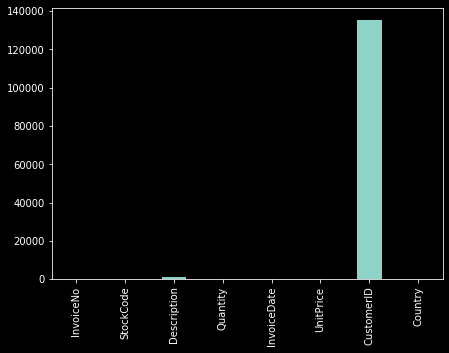

In [5]:
# Null data

print("Null Counts: ", f"{df.isnull().sum()}")
df.isnull().sum().plot(figsize=(7,5), kind='bar')

In [6]:
# Convert to datetime

df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550000,17850.000000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390000,17850.000000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750000,17850.000000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390000,17850.000000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390000,17850.000000,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.650000,17850.000000,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.250000,17850.000000,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.850000,17850.000000,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.850000,17850.000000,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.690000,13047.000000,United Kingdom


In [7]:
# Timstamp per purchase Tracking

query = """
select InvoiceDate
     , count(StockCode) per_cnt
from df
group by 1
order by 2 desc
;
"""

timestamp_purchase_cnt = sqldf(query)
timestamp_purchase_cnt

,InvoiceDate,per_cnt
0,2011-10-31 14:41:00.000000,1114
1,2011-12-08 09:28:00.000000,749
2,2011-12-09 10:03:00.000000,731
3,2011-12-05 17:24:00.000000,721
4,2011-06-29 15:58:00.000000,705
...,...,...
23255,2010-12-01 10:37:00.000000,1
23256,2010-12-01 09:49:00.000000,1
23257,2010-12-01 09:09:00.000000,1
23258,2010-12-01 09:00:00.000000,1


In [8]:
# day per purchase Tracking

query = """
select date(InvoiceDate) Invoice_date
     , count(StockCode) per_cnt
from df
group by 1
order by 1
;
"""

day_purchase_cnt = sqldf(query)
day_purchase_cnt

,Invoice_date,per_cnt
0,2010-12-01,3108
1,2010-12-02,2109
2,2010-12-03,2202
3,2010-12-05,2725
4,2010-12-06,3878
...,...,...
300,2011-12-05,5331
301,2011-12-06,3365
302,2011-12-07,2438
303,2011-12-08,4940


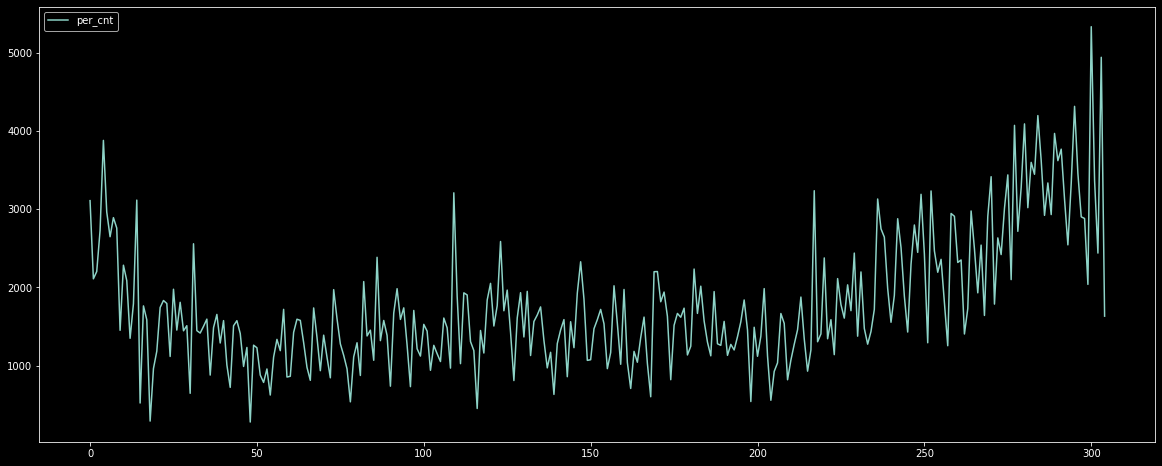

In [9]:
day_purchase_cnt.plot(figsize=(20,8))

In [15]:
query = """
select InvoiceNo
     , StockCode
     , Description
     , Quantity
     , InvoiceDate
     , UnitPrice
     , cast(CustomerID as int) as CustomerID
     , Country
from df
where UnitPrice != 0
and Quantity != 0
and CustomerID is not null
;
"""

df = sqldf(query)
print(df.shape)

df.head(10)

(406789, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000000,2.550000,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000000,3.390000,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000000,2.750000,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000000,3.390000,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000000,3.390000,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00.000000,7.650000,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00.000000,4.250000,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00.000000,1.850000,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00.000000,1.850000,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00.000000,1.690000,13047,United Kingdom


In [17]:
print("Null / Nan values")
df.isnull().sum()

Null / Nan values


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


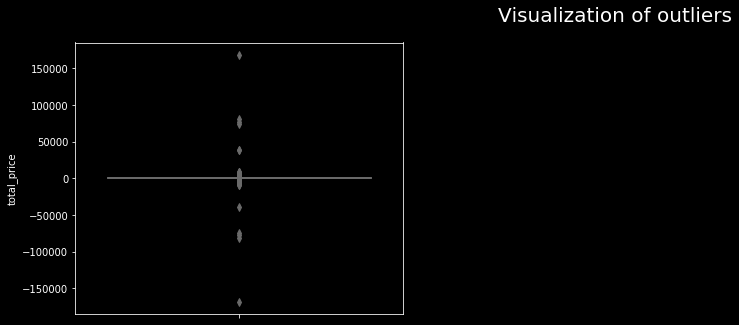

In [20]:
# 이상치 확인(Outliers check)

import seaborn as sns

df['total_price'] = df.UnitPrice * df.Quantity

fig = plt.figure(figsize=(20,5))
fig.suptitle("Visualization of outliers", size=20)

axes = fig.add_subplot(1,3,1)
sns.boxplot(data=df, y='UnitPrice')

axes = fig.add_subplot(1,3,1)
sns.boxplot(data=df, y='Quantity')

axes = fig.add_subplot(1,3,1)
sns.boxplot(data=df, y='total_price')

In [22]:
# 이상치 제외(Outliers Exception)

from scipy import stats

df = df[(np.abs(stats.zscore(df[['total_price']])) < 3).all(axis=1)]
print(df.shape)

df.head(10)

(406533, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000000,2.550000,17850,United Kingdom,15.300000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000000,3.390000,17850,United Kingdom,20.340000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000000,2.750000,17850,United Kingdom,22.000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000000,3.390000,17850,United Kingdom,20.340000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000000,3.390000,17850,United Kingdom,20.340000
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00.000000,7.650000,17850,United Kingdom,15.300000
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00.000000,4.250000,17850,United Kingdom,25.500000
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00.000000,1.850000,17850,United Kingdom,11.100000
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00.000000,1.850000,17850,United Kingdom,11.100000
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00.000000,1.690000,13047,United Kingdom,54.080000


### Exploratory Data Analysis
- General sales trend

In [23]:
# DataFrame 컬럼 이름 변경(lower)

df.columns = ['invoiceNo', 'stockcode', 'description', 'quantity', 'invoice_ts', 'unitprice', 'customerid', 'country', 'total_price']
df['invoice_date'] = [_[:10] for _ in df.invoice_ts]

df.head(10)

,invoiceNo,stockcode,description,quantity,invoice_ts,unitprice,customerid,country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000000,2.550000,17850,United Kingdom,15.300000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000000,3.390000,17850,United Kingdom,20.340000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000000,2.750000,17850,United Kingdom,22.000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000000,3.390000,17850,United Kingdom,20.340000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000000,3.390000,17850,United Kingdom,20.340000
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00.000000,7.650000,17850,United Kingdom,15.300000
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00.000000,4.250000,17850,United Kingdom,25.500000
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00.000000,1.850000,17850,United Kingdom,11.100000
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00.000000,1.850000,17850,United Kingdom,11.100000
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00.000000,1.690000,13047,United Kingdom,54.080000


In [32]:
general_trend = df.groupby('invoice_date')['total_price'].sum()
general_trend = pd.DataFrame(general_trend)

general_trend.head(10)

,total_price
invoice_date,
2010-12-01,44424.060000
2010-12-02,42714.630000
2010-12-03,21284.460000
2010-12-05,31380.600000
2010-12-06,27511.880000
2010-12-07,30375.430000
2010-12-08,38048.680000
2010-12-09,31469.210000
2010-12-10,29026.950000


In [33]:
plt.figure(figsize=(18,5)).suptitle("Evolution of the General Sales Trend", fontsize=20)
sns.lineplot(data = general_trend)
sns.lineplot(data = general_trend['total_price'].rolling(window=30).mean(), palette=['red'])
plt.xticks(df.invoice_date, rotation = 45)
plt.show()

KeyboardInterrupt: 